# Laboratorio 1 - Parte 1

### Regresión polinomial múltiple

### 2019 - I

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En este archivo va a encontrar tanto celdas de código como celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [1]:
#Tomado de https://github.com/rramosp/mooc-grader
from Autentication import *#python 3
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8888)
html

ModuleNotFoundError: No module named 'apiclient'

#### Segundo integrante:

Nombre:


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1: Contextualización del problema

El problema de *regresión* que abordaremos consiste en predecir el valor de la humedad absoluta en el aire, a partir de varias variables sensadas en el aire (Para más información sobre la base de datos y la contextualización del problema, consulte: http://archive.ics.uci.edu/ml/datasets/air+quality). Ejecute la siguiente celda para cargar los datos.

In [20]:
#cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('DB/AirQuality.data',delimiter='\t')  # Assuming tab-delimiter

#Esta es la base de datos AirQuality del UCI Machine Learning Repository.
X = db[:,0:12]
Y = db[:,12]

#### Responda:

1.1 Cuántas muestras tiene la base de datos?: 




In [22]:
np.size(X,0)

9357

1.2 Cuántas caracteristicas tiene el problema?: 



In [23]:
np.size(X,1)

12

<b>Nota</b>: Agregue una celda en la cual incluya las líneas de código usadas para responder las preguntas.

## Ejercicio 2: Completar código 

Analice los siguientes métodos de la teoría vista para los modelos de *regresión polinomial múltiple*, tales como el error cuadrático medio (<font color='blue'>ECM</font>), modelo de regresión múltiple (<font color='blue'>regression</font>), potencia del polinomio (<font color='blue'>potenciaPolinomio</font>) y gradiente descendente. 

Una vez comprenda su funcionamiento proceda a realizar lo siguiente: 
1. Completar el código de la regla de actualización de los parámetros del algoritmo de <font color='blue'>gradiente_descedente</font>: 

$$w_j(iter) = w_j(iter-1) - \eta \frac{\partial E(w)}{\partial w_j}$$ 

2. Graficar el error cuadrático: Error cuadrático medio (ECM) vs. las iteraciones del algoritmo. La gráfica debe llevar título y los correspondientes nombres de los ejes, puedes consultar documentación [aquí](https://matplotlib.org/tutorials/introductory/pyplot.html).

In [73]:
from __future__ import division

#Error cuadrático medio (criterio para el modelo de regresión polinomial)
def ECM(Y_est,Y):
    N = np.size(Y)
    ecm = np.sum((Y_est.reshape(N,1) - Y.reshape(N,1))**2)/(2*N)
    return ecm 

#Modelo Regresión Múltiple
def regression(X, W):
    Yest = np.dot(X,W)    #con np.dot se realiza el producto matricial. Aquí X es dim [Nxd] y W es dim [dx1]
    return Yest           #Esta variable contiene la salida de f(X,W)


#Potencia de polinomio
def potenciaPolinomio(X,grado):
    X2 = X
    
    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)
    
    return X2


"""Gradiente descendente para regresión lineal múltiple
X: Matriz de datos extendida.
W: Vector de parámetros del modelo
eta: Taza de aprendizaje
"""
   
def gradiente_descendente(X,Y,eta):
     
    #Extendemos la matriz de X para el parámetro independiente
    unos = np.array([np.ones(np.size(X,0))])
    #Concatenamos el vector de unos con la matriz X
    X = np.concatenate((unos.T, X), axis=1)
    X = X.reshape(np.size(X,0),np.size(X,1))
    
    Y = Y.reshape(np.size(Y), 1)
    
    #Tomamos el número de variables del problema
    d = np.size(X,1)
    
    #Tomamos el número de muestras de la base de datos
    N = np.size(X,0)
    
    
    #Inicializamos el vector de parámetros 
    W = np.zeros((1,d))
    W = W.reshape(np.size(W), 1)
    
    eta = eta
    
    iteraciones = 500
    ecms = np.zeros(iteraciones)
    c = eta*(1/N)

    for iter in range(iteraciones):
        error = ECM(regression(X,W),Y)
        ecms[iter] = error
        
        #Aquí debe completar el código con la regla de actualización de los parámetros W. 
        #Tenga en cuenta los nombres de las variables ya creadas: W, X, Y
        for j in range(d):
            x = X[:,j].reshape(len(X),1)
            H = regression(X,W)
            W[j] = W[j] - c * sum((H-Y)*x)            
    print ('Vector de parámetros del modelo:\n')
    print (W)
    print ('\nError Final durante el entrenamiento = ' + str(ecms[-1]))
    
    #Aquí debe completar el código para realizar la gráfica de ecms vs. iteraciones
    plt.scatter(list(range(iteraciones)),ecms)
    plt.show()
    
    return W
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: overflow encountered in add
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in add


Vector de parámetros del modelo:

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]

Error Final durante el entrenamiento = nan


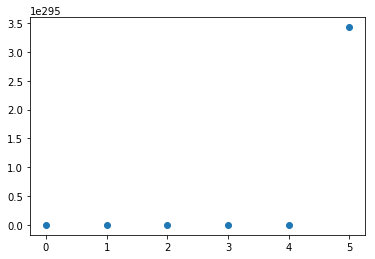

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])

In [74]:
gradiente_descendente(X,Y,0.01)

## Ejercicio 3: Entrenamiento

En este punto debe hacer uso de las funciones escritas en el punto anterior para realizar el proceso de *modelamiento y simulación* de los datos de cargados en el Ejercicio # 1 sobre la predicción del valor de la humedad absoluta en el aire 

A continuación complete el siguiente código llamando a la función <font color='blue'>gradiente_descedente</font> pasandole los parámetros correspondientes (X,y,eta). Debe obtener como salida el vector de parámetros $w$ estimado y la gráfica del error cuadrático medio vs iteraciones.

*Nota*: No olvide definir el grado del polinomio y la taza de aprendizaje (eta)

Vector de parámetros del modelo:

[[-0.03558286]
 [-0.007918  ]
 [ 0.15133842]
 [ 0.00093364]
 [ 0.1928634 ]
 [ 0.12758654]
 [-0.01766559]
 [ 0.12402929]
 [-0.0109535 ]
 [ 0.13628699]
 [ 0.10329179]
 [ 0.1922855 ]
 [ 0.18535403]]

Error Final durante el entrenamiento = 774.0552893900309


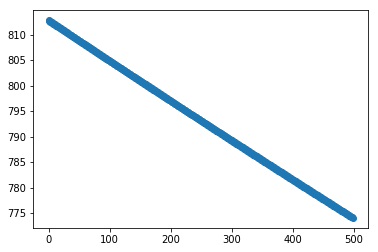


Error durante la prueba = 703.3760212663899


In [75]:
from numpy import random, matlib
import math

N = np.size(X,0)

# #Se modifica la matriz de datos original de acuerdo al grado del polinomio ingresado para el modelo
grado = 1
X2 = potenciaPolinomio(X,grado)

#Dejamos algunas muestras para el proceso de entrenamiento y otras para evaluar qué tan bueno fue el aprendizaje del modelo
random.seed(1)
ind=np.random.permutation(N)
Xtrain = X2[ind[0:int(math.ceil(0.7*N))],:]
Xtest = X2[ind[int(math.ceil(0.7*N)):N],:]
Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
Ytest = Y[ind[int(math.ceil(0.7*N)):N]]

#Normalizamos los datos
media = np.mean(Xtrain)
desvia = np.std(Xtrain)
Xtrain = stats.stats.zscore(Xtrain)
Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

eta = 0.00001

#Complete la siguiente línea de código llamando el método gradiente_descendente con sus respectivos argumentos
W = gradiente_descendente(Xtrain,Ytrain,eta)

#Evaluamos las predicciones del modelo con los datos de test
unos = np.array([np.ones(np.size(Xtest,0))])
Xtest = np.concatenate((unos.T, Xtest), axis=1)
Xtest = Xtest.reshape(np.size(Xtest,0),np.size(Xtest,1))
Yest = regression(Xtest, W)
Error = ECM(Yest,Ytest)
print ('\nError durante la prueba = ' + str(Error))

#### Responda:

3.1 ¿Cuál es el número de coeficientes $w$ que se obtienen al ingresar un polinomio de grado 4? ¿Por qué?:



In [79]:
np.size(potenciaPolinomio(X,4),1)+1

49

3.2 La funci&oacute;n polin&oacute;mica que se est&aacute; usando para grados mayores a 1
est&aacute; incompleta, ¿Por qu&eacute;?:

## Ejercicio 4: Obtener resultados

Identifique la variable "eta" (tasa de aprendizaje $\eta$) en el código anterior, cambie su valor de acuerdo a la siguiente tabla. Haga lo mismo con el valor del grado del polinomio y complete las columnas ECM_Entrenamiento y ECM_Prueba.

Tenga en cuenta que cuando el valor de $\eta$ sea $0.00001$ y el grado del polinomio sea $1$, el valor del ECM de prueba debe ser $703.376$. Esto le servirá de criterio de verificación para la implementación de su algorítmo de gradiente descendente.


In [88]:
import numpy as np
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Tasa de aprendizaje' : pd.Series(['1e-5', '1e-5', '1e-5', '1e-5', '1e-5', '1e-3', '1e-3', '1e-3', '1e-3', '1e-3', '1e-1', '1e-1', '1e-1', '1e-1', '1e-1']),
    'Grado del polinomio' : pd.Series([1,2,3,4,5,1,2,3,4,5,1,2,3,4,5])})
df_types["ECM_Entrenamiento"] = ""
df_types["ECM_Prueba"] = ""
df_types.set_index(['Tasa de aprendizaje','Grado del polinomio'], inplace=True)
df_types["ECM_Entrenamiento"][0] = "774.055"
df_types["ECM_Prueba"][0] = "703.376"
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

############# La posición en el vector es.. 0
############# El valor es 1
Vector de parámetros del modelo:

[[-0.03558286]
 [-0.007918  ]
 [ 0.15133842]
 [ 0.00093364]
 [ 0.1928634 ]
 [ 0.12758654]
 [-0.01766559]
 [ 0.12402929]
 [-0.0109535 ]
 [ 0.13628699]
 [ 0.10329179]
 [ 0.1922855 ]
 [ 0.18535403]]

Error Final durante el entrenamiento = 774.0552893900309


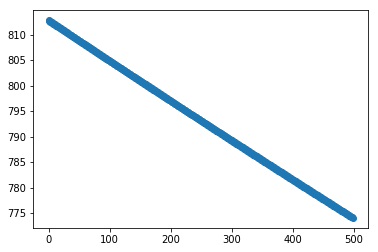


Error durante la prueba = 703.3760212663899
############# La posición en el vector es.. 1
############# El valor es 2
Vector de parámetros del modelo:

[[-0.03558286]
 [-0.0078588 ]
 [ 0.14977092]
 [ 0.00078975]
 [ 0.19110736]
 [ 0.12616532]
 [-0.01766514]
 [ 0.12313504]
 [-0.01094828]
 [ 0.13482475]
 [ 0.10208922]
 [ 0.19057981]
 [ 0.18376591]
 [ 0.00762191]
 [ 0.08306326]
 [ 0.00191657]
 [-0.19414509]
 [ 0.06058994]
 [-0.02324256]
 [ 0.05359599]
 [-0.01135703]
 [ 0.0753644 ]
 [ 0.04648964]
 [-0.19397525]
 [-0.18922125]]

Error Final durante el entrenamiento = 748.188608839837


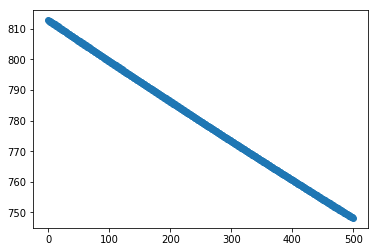


Error durante la prueba = 709.8818828072049
############# La posición en el vector es.. 2
############# El valor es 3
Vector de parámetros del modelo:

[[-0.03558286]
 [-0.00775956]
 [ 0.14837662]
 [ 0.00069346]
 [ 0.18951003]
 [ 0.12492993]
 [-0.01760674]
 [ 0.12227278]
 [-0.01086333]
 [ 0.13353608]
 [ 0.10104174]
 [ 0.18903023]
 [ 0.18226714]
 [ 0.00752045]
 [ 0.08211906]
 [ 0.00179212]
 [-0.19258622]
 [ 0.05981162]
 [-0.02317546]
 [ 0.05328375]
 [-0.01135312]
 [ 0.07448312]
 [ 0.04584576]
 [-0.19240948]
 [-0.18770131]
 [-0.00752786]
 [ 0.0566144 ]
 [ 0.00227079]
 [ 0.19263166]
 [ 0.04095326]
 [-0.02405214]
 [ 0.03330986]
 [-0.01666044]
 [ 0.05169631]
 [ 0.03107224]
 [ 0.1926374 ]
 [ 0.19192376]]

Error Final durante el entrenamiento = 724.9932316211654


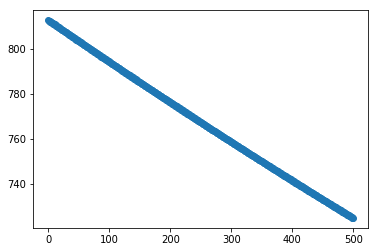


Error durante la prueba = 709.8473166611931
############# La posición en el vector es.. 3
############# El valor es 4
Vector de parámetros del modelo:

[[-0.03558286]
 [-0.00770229]
 [ 0.14710027]
 [ 0.00061687]
 [ 0.18800495]
 [ 0.12380949]
 [-0.01754941]
 [ 0.12141573]
 [-0.01082283]
 [ 0.1323664 ]
 [ 0.10010586]
 [ 0.18755844]
 [ 0.18086039]
 [ 0.00746216]
 [ 0.08129163]
 [ 0.00169143]
 [-0.19110281]
 [ 0.05914122]
 [-0.02307083]
 [ 0.0529507 ]
 [-0.01128965]
 [ 0.07371542]
 [ 0.0453016 ]
 [-0.1909218 ]
 [-0.18624459]
 [-0.00746961]
 [ 0.05596617]
 [ 0.00217267]
 [ 0.19113963]
 [ 0.04041464]
 [-0.02392461]
 [ 0.03310126]
 [-0.01657175]
 [ 0.05108423]
 [ 0.03063649]
 [ 0.19114632]
 [ 0.19044036]
 [ 0.00746896]
 [ 0.03974009]
 [ 0.00194375]
 [-0.19114414]
 [ 0.02815776]
 [-0.02271783]
 [ 0.02002021]
 [-0.01553603]
 [ 0.0368486 ]
 [ 0.02175604]
 [-0.19113991]
 [-0.19100495]]

Error Final durante el entrenamiento = 703.4164395673165


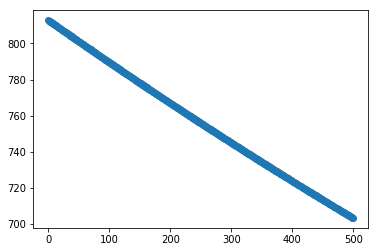


Error durante la prueba = 711.3701531480207
############# La posición en el vector es.. 4
############# El valor es 5
Vector de parámetros del modelo:

[[-0.03558286]
 [-0.00760705]
 [ 0.14589786]
 [ 0.00056715]
 [ 0.18655251]
 [ 0.12276765]
 [-0.01743513]
 [ 0.12055244]
 [-0.01071868]
 [ 0.13126729]
 [ 0.09924383]
 [ 0.18613117]
 [ 0.17948474]
 [ 0.00736681]
 [ 0.08054284]
 [ 0.00161585]
 [-0.18965851]
 [ 0.05854988]
 [-0.02293767]
 [ 0.05259859]
 [-0.01124715]
 [ 0.07302068]
 [ 0.04482911]
 [-0.1894743 ]
 [-0.18483381]
 [-0.00737427]
 [ 0.05539448]
 [ 0.00209764]
 [ 0.18968896]
 [ 0.03995154]
 [-0.02377106]
 [ 0.0328791 ]
 [-0.01642314]
 [ 0.05054398]
 [ 0.03026878]
 [ 0.18969646]
 [ 0.18899547]
 [ 0.00737363]
 [ 0.03928286]
 [ 0.00187675]
 [-0.18969451]
 [ 0.0277814 ]
 [-0.02256491]
 [ 0.01987918]
 [-0.01543856]
 [ 0.03640629]
 [ 0.02145612]
 [-0.18969015]
 [-0.18955629]
 [-0.0073734 ]
 [ 0.02929809]
 [ 0.00156176]
 [ 0.1896872 ]
 [ 0.02028673]
 [-0.02050443]
 [ 0.01242454]
 [-0.02

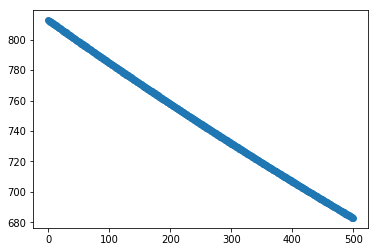


Error durante la prueba = 711.4026416401626
############# La posición en el vector es.. 0
############# El valor es 1
Vector de parámetros del modelo:

[[-2.80822753e+00]
 [ 3.73300422e-03]
 [ 4.51650687e+00]
 [-5.89425194e-01]
 [ 7.24723490e+00]
 [ 3.23669301e+00]
 [-1.32872626e+00]
 [ 6.08924898e+00]
 [-3.80833662e-01]
 [ 3.54872142e+00]
 [ 2.24844715e+00]
 [ 7.48311337e+00]
 [ 7.22124644e+00]]

Error Final durante el entrenamiento = 47.41004951305847


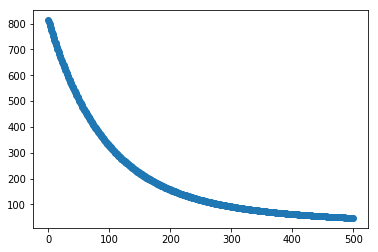


Error durante la prueba = 432.36244848825163
############# La posición en el vector es.. 1
############# El valor es 2
Vector de parámetros del modelo:

[[-2.80822753]
 [ 0.01426294]
 [ 2.90646342]
 [-0.57402285]
 [ 4.69392766]
 [ 2.04107528]
 [-0.67410946]
 [ 3.7365476 ]
 [-0.22484935]
 [ 2.12510508]
 [ 1.49930314]
 [ 4.81772016]
 [ 4.8113992 ]
 [-0.04278061]
 [ 0.68361677]
 [-0.38618898]
 [-5.10586465]
 [-0.05938477]
 [-0.97903186]
 [ 1.78900404]
 [-0.52256416]
 [ 0.1381556 ]
 [-0.16158724]
 [-5.07165122]
 [-4.8933602 ]]

Error Final durante el entrenamiento = 19.415418172690604


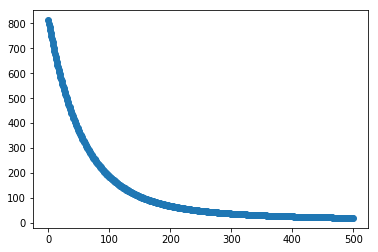


Error durante la prueba = 666.8547928838403
############# La posición en el vector es.. 2
############# El valor es 3
Vector de parámetros del modelo:

[[-2.80822753]
 [ 0.05335775]
 [ 2.1814402 ]
 [-0.44182523]
 [ 3.46772288]
 [ 1.57668082]
 [-0.3432258 ]
 [ 2.60303823]
 [-0.05083187]
 [ 1.58067803]
 [ 1.18593415]
 [ 3.55364939]
 [ 3.5083606 ]
 [-0.07214141]
 [ 0.55893548]
 [-0.22979097]
 [-3.75413697]
 [ 0.03799979]
 [-0.54914791]
 [ 1.11072209]
 [-0.30842582]
 [ 0.11887844]
 [-0.02941477]
 [-3.72841268]
 [-3.62202088]
 [ 0.07190785]
 [-0.0088981 ]
 [-0.22023412]
 [ 3.70272907]
 [-0.37034141]
 [-0.50692196]
 [ 0.52360713]
 [-0.13019249]
 [-0.37677694]
 [-0.30538749]
 [ 3.70245211]
 [ 3.68717225]]

Error Final durante el entrenamiento = 13.54217208361975


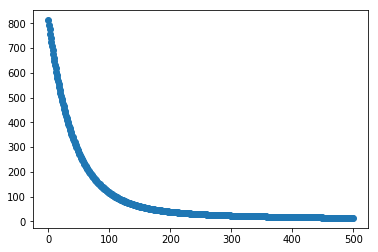


Error durante la prueba = 715.0872818014203
############# La posición en el vector es.. 3
############# El valor es 4
Vector de parámetros del modelo:

[[-2.80822753]
 [ 0.02473805]
 [ 1.75317938]
 [-0.35323001]
 [ 2.73785348]
 [ 1.28856773]
 [-0.22151466]
 [ 1.98638409]
 [-0.0529329 ]
 [ 1.28341579]
 [ 0.98735587]
 [ 2.79207655]
 [ 2.7700259 ]
 [-0.03795072]
 [ 0.5011277 ]
 [-0.14489096]
 [-2.94613522]
 [ 0.10275289]
 [-0.3120284 ]
 [ 0.80000456]
 [-0.15366702]
 [ 0.15101171]
 [ 0.05172952]
 [-2.92898385]
 [-2.83558632]
 [ 0.0378559 ]
 [ 0.06477084]
 [-0.13897675]
 [ 2.90945508]
 [-0.20566819]
 [-0.2667874 ]
 [ 0.33622123]
 [-0.08054567]
 [-0.23179949]
 [-0.15329872]
 [ 2.90859326]
 [ 2.9004466 ]
 [-0.03827108]
 [-0.18940805]
 [-0.07073579]
 [-2.90520988]
 [-0.36680645]
 [-0.21285724]
 [ 0.01323055]
 [-0.1340009 ]
 [-0.43390832]
 [-0.23618038]
 [-2.90206135]
 [-2.89487173]]

Error Final durante el entrenamiento = 11.35418136760518


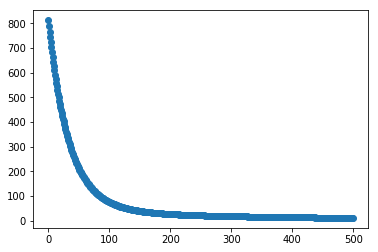


Error durante la prueba = 716.5566416177581
############# La posición en el vector es.. 4
############# El valor es 5
Vector de parámetros del modelo:

[[-2.80822753]
 [ 0.01752597]
 [ 1.45704393]
 [-0.28693783]
 [ 2.25705716]
 [ 1.08328728]
 [-0.1585305 ]
 [ 1.62097048]
 [-0.03170152]
 [ 1.08537883]
 [ 0.82954858]
 [ 2.29755333]
 [ 2.27286872]
 [-0.02763263]
 [ 0.44349726]
 [-0.09771782]
 [-2.41748369]
 [ 0.12827517]
 [-0.21002507]
 [ 0.64939394]
 [-0.11714449]
 [ 0.1726871 ]
 [ 0.07716954]
 [-2.40480485]
 [-2.33126533]
 [ 0.02759093]
 [ 0.09520905]
 [-0.09191341]
 [ 2.39017963]
 [-0.11098281]
 [-0.15795689]
 [ 0.27132127]
 [-0.04210232]
 [-0.13131124]
 [-0.07841028]
 [ 2.38907478]
 [ 2.38116098]
 [-0.02790481]
 [-0.10438827]
 [-0.03370103]
 [-2.38602752]
 [-0.23127251]
 [-0.10532614]
 [ 0.00709894]
 [-0.08627277]
 [-0.28924585]
 [-0.13632199]
 [-2.38351013]
 [-2.37813089]
 [ 0.02813011]
 [-0.20566261]
 [-0.01218636]
 [ 2.37857221]
 [-0.26892541]
 [-0.05780997]
 [-0.14544697]
 [-0.04

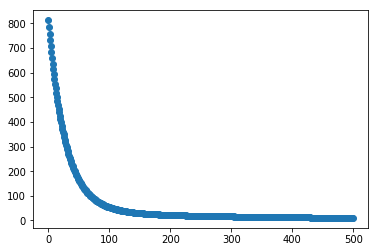


Error durante la prueba = 711.3664458640579
############# La posición en el vector es.. 0
############# El valor es 1
Vector de parámetros del modelo:

[[-7.13434276]
 [-0.04011002]
 [ 1.27523388]
 [ 0.17765478]
 [16.67625037]
 [ 0.22661395]
 [-1.43414047]
 [ 1.5192288 ]
 [ 1.13787957]
 [-5.13791717]
 [ 0.03553166]
 [17.45184717]
 [ 7.89509033]]

Error Final durante el entrenamiento = 0.9232194231915989


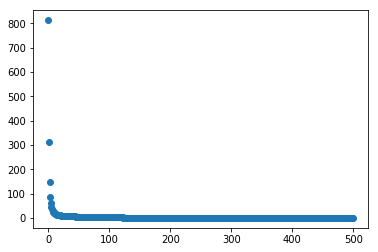


Error durante la prueba = 1337.7484636331963
############# La posición en el vector es.. 1
############# El valor es 2
Vector de parámetros del modelo:

[[-7.13434276]
 [-0.07400147]
 [ 2.87692169]
 [-0.22481694]
 [ 7.72851919]
 [ 0.94943972]
 [-0.4057207 ]
 [ 2.81805872]
 [ 0.26105871]
 [ 0.32017528]
 [ 0.34154942]
 [ 6.17625873]
 [ 5.93978829]
 [-0.07569192]
 [-1.58676459]
 [ 0.18906272]
 [-6.12465562]
 [-1.00626941]
 [ 0.24208009]
 [-1.3980778 ]
 [-0.03271551]
 [-1.08586742]
 [-0.25412185]
 [-5.84185628]
 [-5.4160829 ]]

Error Final durante el entrenamiento = 0.11058163357746002


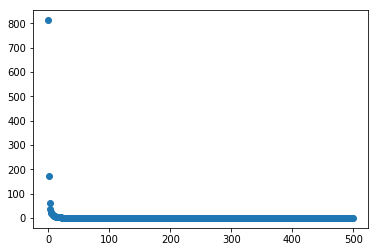


Error durante la prueba = 845.31989761889
############# La posición en el vector es.. 2
############# El valor es 3
Vector de parámetros del modelo:

[[-7.13434276e+00]
 [-9.35657426e-02]
 [ 2.38425221e+00]
 [-1.57820203e-01]
 [ 5.86727639e+00]
 [ 5.92782360e-01]
 [-7.40541489e-02]
 [ 1.85514098e+00]
 [-5.87770972e-02]
 [-7.59182537e-04]
 [ 1.42099205e-01]
 [ 4.89198782e+00]
 [ 4.28396476e+00]
 [-2.32352991e-02]
 [-8.44189875e-01]
 [ 2.56030528e-01]
 [-4.73843586e+00]
 [-9.89425606e-01]
 [-2.04524034e-02]
 [-4.90048688e-01]
 [-2.39105335e-02]
 [-9.92307093e-01]
 [-4.44442501e-01]
 [-4.49684261e+00]
 [-4.52700429e+00]
 [ 6.80558312e-02]
 [-4.93731596e-01]
 [-1.42257244e-01]
 [ 3.55343570e+00]
 [ 1.48350611e-01]
 [ 3.74756116e-02]
 [-3.88843252e-01]
 [ 1.34611132e-01]
 [ 5.17142068e-01]
 [ 3.99668116e-01]
 [ 3.14557211e+00]
 [ 2.52675144e+00]]

Error Final durante el entrenamiento = 0.047965648474750315


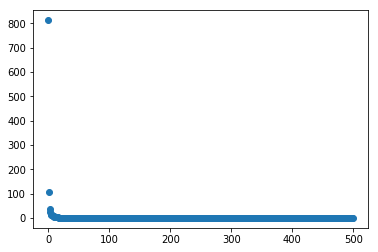


Error durante la prueba = 685.3369170531051
############# La posición en el vector es.. 3
############# El valor es 4
Vector de parámetros del modelo:

[[-7.13434276e+00]
 [-1.03631807e-01]
 [ 2.13797365e+00]
 [-1.01147876e-01]
 [ 4.93178319e+00]
 [ 6.92599853e-01]
 [-3.27803180e-02]
 [ 1.38463712e+00]
 [-1.38278797e-01]
 [ 2.49998200e-01]
 [ 2.53459579e-01]
 [ 4.29632766e+00]
 [ 3.66979244e+00]
 [-3.03151041e-03]
 [-7.36899241e-01]
 [ 1.84140649e-01]
 [-3.99106096e+00]
 [-9.93679734e-01]
 [ 6.84446040e-02]
 [-5.76829834e-01]
 [-2.37760091e-02]
 [-1.02229990e+00]
 [-5.18957863e-01]
 [-3.73526546e+00]
 [-3.69234358e+00]
 [ 3.94794245e-02]
 [-5.46466543e-01]
 [-5.53073947e-02]
 [ 2.99226720e+00]
 [-3.72560394e-01]
 [ 3.52945851e-02]
 [-3.81797219e-01]
 [ 1.50061951e-01]
 [-1.90809918e-01]
 [-3.24366218e-03]
 [ 2.69996335e+00]
 [ 2.22662202e+00]
 [-5.79814340e-02]
 [ 3.74197039e-02]
 [-5.62161881e-02]
 [-2.21032789e+00]
 [ 3.17108610e-01]
 [-5.58676471e-02]
 [ 2.52387431e-01]
 [-2.703268

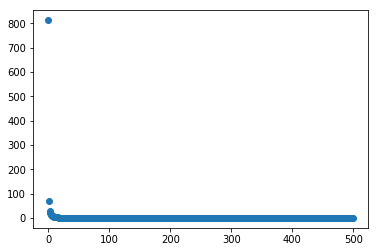


Error durante la prueba = 674.363615996056
############# La posición en el vector es.. 4
############# El valor es 5
Vector de parámetros del modelo:

[[-7.13434276e+00]
 [-1.11352540e-01]
 [ 1.99280106e+00]
 [-9.31703778e-02]
 [ 4.46002642e+00]
 [ 7.51973996e-01]
 [-5.93332871e-02]
 [ 1.30567263e+00]
 [-1.56625198e-01]
 [ 4.66273460e-01]
 [ 2.87892368e-01]
 [ 3.91485667e+00]
 [ 3.26172974e+00]
 [ 8.51209335e-03]
 [-6.61264596e-01]
 [ 1.53493383e-01]
 [-3.57177500e+00]
 [-8.34164291e-01]
 [ 1.03073693e-01]
 [-4.60231980e-01]
 [-7.01131817e-02]
 [-8.49191105e-01]
 [-4.24814903e-01]
 [-3.30795088e+00]
 [-3.30996412e+00]
 [ 2.28826729e-02]
 [-5.93553389e-01]
 [-5.25743363e-02]
 [ 2.65835579e+00]
 [-4.44209657e-01]
 [ 7.43640890e-02]
 [-4.11372966e-01]
 [ 1.58522566e-01]
 [-3.91047331e-01]
 [-5.82098487e-02]
 [ 2.41793779e+00]
 [ 1.97827755e+00]
 [-3.80623946e-02]
 [-1.71373884e-01]
 [-3.03094074e-02]
 [-1.98477193e+00]
 [-2.20656960e-02]
 [-1.94103606e-02]
 [-6.21572587e-02]
 [-3.6030705

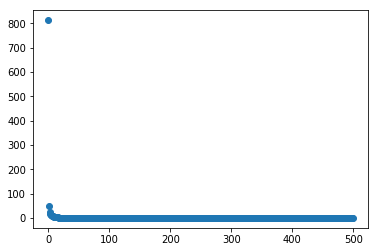


Error durante la prueba = 679.1952705182399


In [94]:
etaArray = ['1e-5', '1e-5', '1e-5', '1e-5', '1e-5', '1e-3', '1e-3', '1e-3', '1e-3', '1e-3', '1e-1', '1e-1', '1e-1', '1e-1', '1e-1']
polGrade = [1,2,3,4,5]
sizeEta = len(etaArray)
sizePol = len(polGrade)

for i in range(sizeEta):
    N = np.size(X,0)

    # #Se modifica la matriz de datos original de acuerdo al grado del polinomio ingresado para el modelo
    grado = polGrade[i%sizePol]
    print('############# La posición en el vector es..',i%sizePol)
    print('############# El valor es', grado)
    X2 = potenciaPolinomio(X,grado)

    #Dejamos algunas muestras para el proceso de entrenamiento y otras para evaluar qué tan bueno fue el aprendizaje del modelo
    random.seed(1)
    ind=np.random.permutation(N)
    Xtrain = X2[ind[0:int(math.ceil(0.7*N))],:]
    Xtest = X2[ind[int(math.ceil(0.7*N)):N],:]
    Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
    Ytest = Y[ind[int(math.ceil(0.7*N)):N]]

    #Normalizamos los datos
    media = np.mean(Xtrain)
    desvia = np.std(Xtrain)
    Xtrain = stats.stats.zscore(Xtrain)
    Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

    eta = float(etaArray[i])

    #Complete la siguiente línea de código llamando el método gradiente_descendente con sus respectivos argumentos
    W = gradiente_descendente(Xtrain,Ytrain,eta)

    #Evaluamos las predicciones del modelo con los datos de test
    unos = np.array([np.ones(np.size(Xtest,0))])
    Xtest = np.concatenate((unos.T, Xtest), axis=1)
    Xtest = Xtest.reshape(np.size(Xtest,0),np.size(Xtest,1))
    Yest = regression(Xtest, W)
    Error = ECM(Yest,Ytest)
    print ('\nError durante la prueba = ' + str(Error))



Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [95]:
qgrid_widget.get_changed_df()

ECM_Entrenamiento ECM_Prueba
Tasa de aprendizaje Grado del polinomio                             
1e-5                1                             774.055    703.376
                    2                                               
                    3                                               
                    4                                               
                    5                                               
1e-3                1                                               
                    2                                               
                    3                                               
                    4                                               
                    5                                               
1e-1                1                                               
                    2                                               
                    3                                               
                    4                                               
                    5

## Ejercicio 5: Pruebas

En la celda de código del Ejercicio # 3, comente la línea donde se normalizan las matrices de datos Xtrain y Xtest. Realice pruebas para diferentes valores de $\eta$ y de grado del polinomio de manera similar a los valores que usó en el punto 3. Observe que pasa con el ECM.

#### Responda

4.1 Qué sucede con los valores del ECM?



4.2 A qué se debe lo que observa?


4.3 ¿Qu&eacute; proceso hace la normalizaci&oacute;n sobre los datos? Consulte por qu&eacute; es necesaria la normalizaci&oacute;n en el modelo de regresi&oacute;n log&iacute;stica y cu&aacute;les son los tipos de normalizaci&oacute;n m&aacute;s comunes. ¿Cu&aacute;l de ellos se aplic&oacute; en el laboratorio?